In [93]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Task 1

Считайте данные из файла, выведите размерность данных, посмотрите на типы признаков.

In [66]:
data = pd.read_csv("Data.txt", delimiter=" ", error_bad_lines=False)

In [67]:
data

Place  Climate  HousingCost  \
0                                    Abilene,TX      521         6200   
1                                      Akron,OH      575         8138   
2                                     Albany,GA      468         7339   
3                    Albany-Schenectady-Troy,NY      476         7908   
4                                Albuquerque,NM      659         8393   
5                                 Alexandria,LA      520         5819   
6                     Allentown,Bethlehem,PA-NJ      559         8288   
7                         Alton,Granite-City,IL      537         6487   
8                                    Altoona,PA      561         6191   
9                                   Amarillo,TX      609         6546   
10                         Anaheim-Santa-Ana,CA      885        16047   
11                                 Anchorage,AK      195        12175   
12                                  Anderson,IN      530         5704   
13                                  Anderson,SC      591         5725   
14                                 Ann-Arbor,MI      546        11014   
15                                  Anniston,AL      560         5530   
16                   Appleton-Oshkosh-Neenah,WI      396         7877   
17                                 Asheville,NC      694         6722   
18                                    Athens,GA      601         6691   
19                                   Atlanta,GA      696         8316   
20                             Atlantic-City,NJ      615        11074   
21                                Augusta,GA-SC      534         6292   
22                              Aurora-Elgin,IL      474        10384   
23                                    Austin,TX      435         8831   
24                               Bakersfield,CA      560         8068   
25                                 Baltimore,MD      567         9148   
26                                    Bangor,ME      451         7277   
27                               Baton-Rouge,LA      427         8083   
28                              Battle-Creek,MI      527         6342   
29                      Beaumont-Port-Arthur,TX      423         6288   
..                                          ...      ...          ...   
299                                   Toledo,OH      518         7767   
300                                   Topeka,KS      501         7110   
301                                  Trenton,NJ      636        10616   
302                                   Tuscon,AZ      589         8548   
303                                    Tulsa,OK      530         7498   
304                               Tuscaloosa,AL      470         6464   
305                                    Tyler,TX      500         7298   
306                               Utica-Rome,NY      548         6744   
307                   Vallejo-Fairfield-Napa,CA      821        10503   
308                                Vancouver,WA      768         9015   
309                                 Victoria,TX      336         7143   
310             Vineland-Millville-Bridgeton,NJ      615         7295   
311               Visalia-Tulare-Porterville,CA      543         7778   
312                                     Waco,TX      412         6106   
313                         Washington,DC-MD-VA      631        13724   
314                                Materbury,CT      569        10024   
315                     Waterloo-Cedar-Falls,IA      347         7881   
316                                   Wausau,WI      308         7642   
317  West-Palm-Beach-Boca-Raton-Delray-Beach,FL      509        10512   
318                              Wheeling,WV-OH      542         6576   
319                                  Wichita,KS      494         7061   
320                            Wichita-Falls,TX      456         6404   
321                             Williamsport,PA      558         7284   
322                        

In [68]:
data.shape

(329, 13)

In [69]:
data.describe()

Climate   HousingCost     HlthCare       Transp         Educ  \
count  329.000000    329.000000   329.000000   329.000000   329.000000   
mean   538.732523   8346.559271  1185.738602  4210.082067  2814.887538   
std    120.808259   2385.262622  1003.002036  1451.179240   320.792953   
min    105.000000   5159.000000    43.000000  1145.000000  1701.000000   
25%    480.000000   6760.000000   583.000000  3141.000000  2619.000000   
50%    542.000000   7877.000000   833.000000  4080.000000  2794.000000   
75%    592.000000   9015.000000  1445.000000  5205.000000  3012.000000   
max    910.000000  23640.000000  7850.000000  8625.000000  3781.000000   

               Arts      Recreat         Econ        Long           Pop  
count    329.000000   329.000000   329.000000  329.000000  3.290000e+02  
mean    3150.884498  1845.957447  5525.364742  -90.178579  5.221184e+05  
std     4642.283738   807.888171  1084.468523   14.625073  8.933226e+05  
min       52.000000   300.000000  3045.000000 -127.201600  6.282000e+04  
25%      778.000000  1316.000000  4842.000000  -96.685000  1.328660e+05  
50%     1871.000000  1670.000000  5384.000000  -86.807000  2.416170e+05  
75%     3844.000000  2176.000000  6113.000000  -80.012700  5.152590e+05  
max    56745.000000  4800.000000  9980.000000  -68.772000  8.274961e+06

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
Place          329 non-null object
Climate        329 non-null int64
HousingCost    329 non-null int64
HlthCare       329 non-null int64
Crime          329 non-null object
Transp         329 non-null int64
Educ           329 non-null int64
Arts           329 non-null int64
Recreat        329 non-null int64
Econ           329 non-null int64
Long           329 non-null float64
Lat            329 non-null object
Pop            329 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 33.5+ KB


# Task 2

Все признаки являются числовыми (кроме Place).

Но вы можете заметить, что некоторым признакам при чтении данных был присвоен другой тип.

Определите причины неверного определения типа, исправьте и переведите эти признаки в числовые.

### Crime to int64

In [71]:
data.loc[data["Crime"] == "7o7"].Place

53    Burlington,NC
Name: Place, dtype: object

In [72]:
data.loc[data['Place'] == "Burlington,NC", 'Crime'] = 707

In [73]:
data[data["Place"] == "Burlington,NC"].Crime == 707

53    True
Name: Crime, dtype: bool

In [74]:
data["Crime"] = data["Crime"].astype("int64")

### Lat to float64

In [75]:
#data["Lat"] = data["Lat"].astype("float64")

In [76]:
data.loc[data["Lat"] == "36,2043"].Place

311    Visalia-Tulare-Porterville,CA
Name: Place, dtype: object

In [77]:
data.loc[data['Place'] == "Visalia-Tulare-Porterville,CA", 'Lat'] = 36.2043

In [78]:
data[data["Place"] == "Visalia-Tulare-Porterville,CA"].Lat == 36.2043

311    True
Name: Lat, dtype: bool

In [79]:
bad_lats = data.loc[data["Lat"].str.contains(",", na=False)]

In [80]:
places = bad_lats.Place
places

57                            Cedar-Rapids,IA
215    Norfolk-Virginia-Beach-Newport-News,VA
310           Vineland-Millville-Bridgeton,NJ
Name: Place, dtype: object

In [81]:
for place in places:
    print(place)
    data.loc[data["Place"] == place, "Lat"] = data[data["Place"] == place].Lat.str.replace(",",".")

Cedar-Rapids,IA
Norfolk-Virginia-Beach-Newport-News,VA
Vineland-Millville-Bridgeton,NJ


In [82]:
# Check on success
for place in places:
    lat = data.loc[data["Place"] == place].Lat
    print(lat)

57    41.975
Name: Lat, dtype: object
215    36.8897
Name: Lat, dtype: object
310    39.4377
Name: Lat, dtype: object


In [83]:
data["Lat"] = data["Lat"].astype("float64")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
Place          329 non-null object
Climate        329 non-null int64
HousingCost    329 non-null int64
HlthCare       329 non-null int64
Crime          329 non-null int64
Transp         329 non-null int64
Educ           329 non-null int64
Arts           329 non-null int64
Recreat        329 non-null int64
Econ           329 non-null int64
Long           329 non-null float64
Lat            329 non-null float64
Pop            329 non-null int64
dtypes: float64(2), int64(10), object(1)
memory usage: 33.5+ KB


# Task 3

На самом деле, в данных представлены не города, а местности. Поэтому они могу находиться сразу в нескольких штатах (несколько кодов через - в столбце Place).
Измените исходный датасет, заменив каждое наблюдение с n штатами на n строк - по одной для каждого штата.

In [85]:
print(data.shape)
adding_list = []
for index, row in data.iterrows():
    place_split = row.Place.split(',')
    end = place_split.pop()
    states = end.split('-')
    print(end)
    if('-' in end):
        number_of_areas = len(states)
        for state in states:
            new_row = row.copy()
            
            place_split.append(state)
            new_row.Place = ','.join(place_split)
            place_split.pop()
            
            #Деление для Task5
            new_row.Pop = int(new_row.Pop/number_of_areas)
            
            print(new_row)
            adding_list.append(new_row)
        
        data.drop(index, inplace=True)
        print("done")

print(data.shape)
print("size:", len(adding_list))
for row in adding_list:
    data = data.append(row, ignore_index=True)
print(data.shape)

(329, 13)
TX
OH
GA
NY
NM
LA
PA-NJ
Place          Allentown,Bethlehem,PA
Climate                           559
HousingCost                      8288
HlthCare                          621
Crime                             514
Transp                           2881
Educ                             3144
Arts                             2333
Recreat                          1117
Econ                             5097
Long                         -75.4405
Lat                           40.6155
Pop                            317740
Name: 6, dtype: object
Place          Allentown,Bethlehem,NJ
Climate                           559
HousingCost                      8288
HlthCare                          621
Crime                             514
Transp                           2881
Educ                             3144
Arts                             2333
Recreat                          1117
Econ                             5097
Long                         -75.4405
Lat                           4

# Task 5

Посчитайте число жителей в каждом штате в рамках данного датасета.
В тех случаях, когда местность представлена n штатами, поделите жителей этой местности поровну между штатами - каждому штату по Pop/n.
Постройте barplot числа жителей в кажом штате.
Какие штаты представлены наибольшим числом жилетей в данном датасете?
Постройте график зависимости числа жителей штата от количества местностей, которыми он задан в данном датасете.

In [86]:
states = set()
for index, row in data.iterrows():
    states.update([row.Place.split(',')[-1]])
print(len(states))

51


In [87]:
# dictionary key - state, value - number of people 
#В тех случаях, когда местность представлена n штатами, поделите жителей 
#этой местности поровну между штатами - каждому штату по Pop/n. 
pop_dict = {}
for state in states:
    state_areas = data[data.Place.str.contains(state)]
    people_in_state = state_areas.Pop.sum()
    pop_dict[state] = [people_in_state, state_areas.shape[0]]#int(people_in_state/state_area.shape[0])
pop_dict

{'AK': [174431, 1],
 'AL': [2534610, 10],
 'AR': [1164659, 6],
 'AZ': [2040495, 2],
 'CA': [22554526, 22],
 'CO': [2326479, 6],
 'CT': [2778841, 11],
 'DC': [1083607, 1],
 'DE': [174407, 1],
 'FL': [8798803, 19],
 'GA': [3370619, 8],
 'HI': [762565, 1],
 'IA': [1418847, 8],
 'ID': [173036, 1],
 'IL': [10191083, 15],
 'IN': [4355498, 14],
 'KS': [1152900, 4],
 'KY': [1674491, 7],
 'LA': [2892339, 8],
 'MA': [5032789, 12],
 'MD': [3624522, 5],
 'ME': [457909, 4],
 'MI': [7480512, 11],
 'MN': [1525940, 5],
 'MO': [2342218, 6],
 'MS': [966745, 4],
 'MT': [188731, 2],
 'NC': [2825147, 9],
 'ND': [214875, 3],
 'NE': [544173, 3],
 'NH': [658417, 5],
 'NJ': [9032165, 11],
 'NM': [516040, 2],
 'NV': [656710, 2],
 'NY': [15869284, 13],
 'OH': [7949988, 16],
 'OK': [1774824, 5],
 'OR': [1763276, 4],
 'PA': [8479906, 15],
 'RI': [976245, 4],
 'SC': [2311668, 7],
 'SD': [109435, 1],
 'TN': [2226164, 6],
 'TX': [11345234, 28],
 'UT': [1128328, 2],
 'VA': [3809087, 8],
 'VT': [115308, 1],
 'WA': [332

In [88]:
df = pd.DataFrame.from_dict(pop_dict, orient = 'index', columns=['Pop', 'Areas'])
df

Pop  Areas
NC   2825147      9
KS   1152900      4
TX  11345234     28
LA   2892339      8
AZ   2040495      2
AL   2534610     10
NE    544173      3
MN   1525940      5
OH   7949988     16
MS    966745      4
VT    115308      1
NJ   9032165     11
CT   2778841     11
DE    174407      1
GA   3370619      8
AR   1164659      6
NY  15869284     13
WY     71856      1
OK   1774824      5
MA   5032789     12
WI   4259110     13
CO   2326479      6
UT   1128328      2
IL  10191083     15
CA  22554526     22
ID    173036      1
MT    188731      2
OR   1763276      4
IN   4355498     14
DC   1083607      1
SD    109435      1
AK    174431      1
MD   3624522      5
IA   1418847      8
MO   2342218      6
RI    976245      4
WA   3322268      9
MI   7480512     11
NM    516040      2
HI    762565      1
NH    658417      5
PA   8479906     15
NV    656710      2
ND    214875      3
ME    457909      4
WV    688911      6
KY   1674491      7
FL   8798803     19
VA   3809087      8
SC   2311668      7
TN   2226164      6

In [89]:
df.sort_values(by=['Pop'])

Pop  Areas
WY     71856      1
SD    109435      1
VT    115308      1
ID    173036      1
DE    174407      1
AK    174431      1
MT    188731      2
ND    214875      3
ME    457909      4
NM    516040      2
NE    544173      3
NV    656710      2
NH    658417      5
WV    688911      6
HI    762565      1
MS    966745      4
RI    976245      4
DC   1083607      1
UT   1128328      2
KS   1152900      4
AR   1164659      6
IA   1418847      8
MN   1525940      5
KY   1674491      7
OR   1763276      4
OK   1774824      5
AZ   2040495      2
TN   2226164      6
SC   2311668      7
CO   2326479      6
MO   2342218      6
AL   2534610     10
CT   2778841     11
NC   2825147      9
LA   2892339      8
WA   3322268      9
GA   3370619      8
MD   3624522      5
VA   3809087      8
WI   4259110     13
IN   4355498     14
MA   5032789     12
MI   7480512     11
OH   7949988     16
PA   8479906     15
FL   8798803     19
NJ   9032165     11
IL  10191083     15
TX  11345234     28
NY  15869284     13
CA  22554526     22

In [90]:
df.index.name

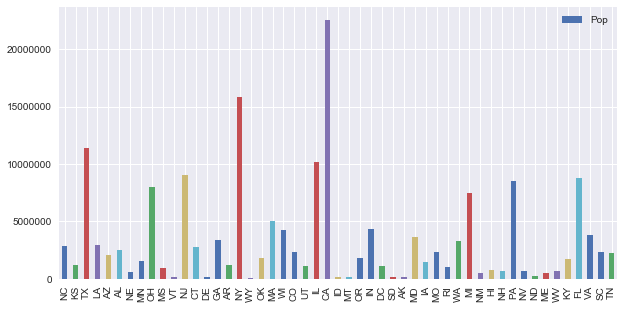

In [97]:
df.plot.bar(x = df.index.name, y = 'Pop', figsize=[10,5])
plt.ticklabel_format(style='plain', axis='y')

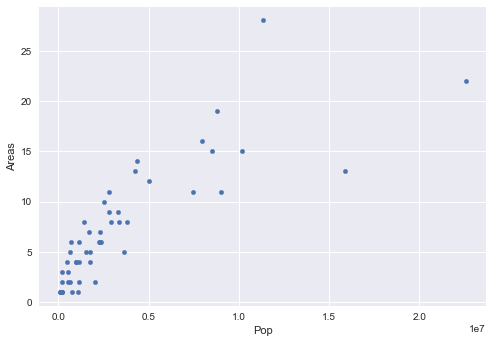

In [95]:
df.plot.scatter(x='Pop', y='Areas')

# Task 6

Посчитайте базовые статистики (минимум, максимум, среднее, медиана, 1 и 3 квартили) для всех признаков (кроме Log и Lat) по штатам. Ориентируясь на средние значения, какие штаты наиболее (топ 5) приятны для жизни с точки зрения климата, экономики, образования?

In [105]:
#Добавление столбца State
data['State'] = ''
for i in range(data.shape[0]):
    separator_index = data.iloc[i]["Place"].rfind(',')
    data['State'].iloc[i] = data.iloc[i]['Place'][separator_index + 1:]

In [107]:
data.describe()

Climate   HousingCost     HlthCare        Crime       Transp  \
count  367.000000    367.000000   367.000000   367.000000   367.000000   
mean   538.324251   8294.613079  1221.577657   948.820163  4242.910082   
std    120.180948   2344.520423  1027.881010   354.373418  1471.926129   
min    105.000000   5159.000000    43.000000   308.000000  1145.000000   
25%    482.000000   6743.000000   593.000000   690.000000  3142.500000   
50%    544.000000   7866.000000   860.000000   937.000000  4084.000000   
75%    597.000000   9011.500000  1466.000000  1150.500000  5281.500000   
max    910.000000  23640.000000  7850.000000  2498.000000  8625.000000   

              Educ          Arts      Recreat         Econ        Long  \
count   367.000000    367.000000   367.000000   367.000000  367.000000   
mean   2825.460490   3270.313351  1829.844687  5508.618529  -89.412674   
std     325.113033   4749.253836   783.661053  1063.456814   14.247530   
min    1701.000000     52.000000   300.000000  3045.000000 -127.201600   
25%    2619.000000    781.500000  1292.000000  4842.500000  -95.620000   
50%    2803.000000   1921.000000  1670.000000  5341.000000  -86.260000   
75%    3026.000000   4151.500000  2159.000000  6077.500000  -79.849000   
max    3781.000000  56745.000000  4800.000000  9980.000000  -68.772000   

              Lat           Pop  
count  367.000000  3.670000e+02  
mean    38.316018  4.680571e+05  
std      4.980844  8.178624e+05  
min     25.646500  5.389100e+04  
25%     34.749500  1.228125e+05  
50%     39.645000  2.022510e+05  
75%     41.794000  4.671630e+05  
max     48.880460  8.274961e+06

In [108]:
data.groupby('State').describe()

Arts                                                                    \
      count          mean           std      min       25%      50%       75%   
State                                                                           
AK      1.0   2346.000000           NaN   2346.0   2346.00   2346.0   2346.00   
AL     10.0   1386.900000   1144.356631    117.0    456.25   1403.0   1836.75   
AR      6.0   1527.000000   1715.667217     63.0    202.00   1144.0   2113.75   
AZ      2.0   4731.000000    223.445743   4573.0   4652.00   4731.0   4810.00   
CA     22.0   4610.818182   5341.713152    122.0   1311.25   3209.5   5555.75   
CO      6.0   3009.833333   2823.160103   1254.0   1382.50   1679.0   3184.50   
CT     11.0   4225.000000   3496.220874    318.0    947.00   3616.0   7633.50   
DC      1.0  21701.000000           NaN  21701.0  21701.00  21701.0  21701.00   
DE      1.0   4545.000000           NaN   4545.0   4545.00   4545.0   4545.00   
FL     19.0   1657.210526   1548.947154     87.0    374.00    817.0   2431.00   
GA      8.0   2553.750000   2251.867209    237.0   1338.00   2061.5   2748.75   
HI      1.0   7168.000000           NaN   7168.0   7168.00   7168.0   7168.00   
IA      8.0   1819.125000   1153.173935    340.0    988.75   1625.0   2441.25   
ID      1.0   2385.000000           NaN   2385.0   2385.00   2385.0   2385.00   
IL     15.0   3818.600000   6199.987613     75.0   1021.50   1983.0   3461.50   
IN     14.0   2974.285714   2600.655108    285.0   1388.50   2366.5   3797.75   
KS      4.0   2234.000000    984.370865   1167.0   1515.75   2309.5   3027.75   
KY      7.0   3312.285714   3244.305201    111.0   1340.00   2195.0   4256.00   
LA      8.0   2607.000000   2491.334181    334.0   1273.25   1650.0   3178.75   
MA     12.0   3269.166667   5718.812303    228.0    681.75   1892.5   3111.75   
MD      5.0   7446.400000   8817.181511    373.0    825.00   4545.0   9788.00   
ME      4.0   1311.750000   1031.729091    165.0    593.25   1365.5   2084.00   
MI     11.0   2966.909091   3300.421472     79.0    441.50   2071.0   3730.50   
MN      5.0   3768.400000   4483.638456    769.0   1871.00   2111.0   2377.00   
MO      6.0   3320.666667   3333.724144     80.0   1067.75   2258.0   4885.25   
MS      4.0   2132.250000   2059.205571    155.0    548.00   1944.0   3528.25   
MT      2.0    589.500000    266.579257    401.0    495.25    589.5    683.75   
NC      9.0   2047.666667   2104.129986    131.0    567.00   1077.0   4188.00   
ND      3.0   1747.666667    474.376784   1211.0   1566.00   1921.0   2016.00   
NE      3.0   3234.333333   1636.552881   1393.0   2590.00   3787.0   4155.00   
NH      5.0   1586.000000   1222.735049    165.0    475.00   2111.0   2122.00   
NJ     11.0   7133.090909   5106.948060    621.0   3439.00   7420.0   8681.00   
NM      2.0   3650.000000   1196.424674   2804.0   3227.00   3650.0   4073.00   
NV      2.0   1898.000000    441.234631   1586.0   1742.00   1898.0   2054.00   
NY     13.0   7960.692308  14986.599060    603.0    966.00   4655.0   6987.00   
OH     16.0   3708.187500   3697.032039     91.0    880.25   2440.5   5835.00   
OK      5.0   2146.200000   2245.825617    145.0    215.00   1280.0   4248.00   
OR      4.0   2584.500000   1893.094204    691.0   1564.75   2243.5   3263.25   
PA     15.0   2965.933333   4768.752165     52.0    840.50   1271.0   2182.50   
RI      4.0   2136.250000   2691.910397    480.0    681.75    956.5   2411.00   
SC      7.0   2029.714286   1473.989678    169.0    837.50   2489.0   2781.00   
SD      1.0    465.000000           NaN    465.0    465.00    465.0    465.00   
TN      6.0   2776.000000   1647.593396    111.0   2064.50   2896.0   4083.75   
TX     27.0   2340.925926   2934.721477     68.0    421.00   1235.0   2702.00   
UT      2.0   3756.500000   2505.279326   1985.0   2870.75   3756.5   4642.25   
VA      8.0   5032.375000   7166.496832     85.0   1217.00   1673.5   6044.50   
VT      1.0   1741.000000           Na

In [110]:
for column in ['Climate', 'Educ', 'Econ']:
    print(column)
    print(data.groupby('State').describe()[column].sort_values(by=['mean']))

Climate
       count        mean         std    min     25%    50%     75%    max
State                                                                    
ND       3.0  134.000000   25.119713  105.0  126.50  148.0  148.50  149.0
AK       1.0  195.000000         NaN  195.0  195.00  195.0  195.00  195.0
MN       5.0  227.400000   69.529131  148.0  193.00  195.0  293.00  308.0
SD       1.0  276.000000         NaN  276.0  276.00  276.0  276.00  276.0
WI      13.0  377.230769   95.094824  193.0  308.00  378.0  460.00  496.0
VT       1.0  383.000000         NaN  383.0  383.00  383.0  383.00  383.0
WY       1.0  401.000000         NaN  401.0  401.00  401.0  401.00  401.0
NE       3.0  407.666667   28.746014  385.0  391.50  398.0  419.00  440.0
IA       8.0  417.875000   34.406966  347.0  410.50  434.0  440.00  444.0
MT       2.0  431.000000   29.698485  410.0  420.50  431.0  441.50  452.0
LA       8.0  466.625000   38.250817  427.0  428.50  462.0  500.50  520.0
ME       4.0  473.250000   17.

Климат: CA, WA, HI, OR, DC
Образование: DC, VT, MD, NJ, OR
Экономика: AK, NH, OK, FL, TX

# Task 7

Создайте признак HousingCost_cat - категория стоимости жилья: low (признак ниже 1-го квартиля), medium (признак между 1 и 3 квартилями) и high (признак выше 3-го квартиля). Посчитайте количество наблюдений в каждом штате по каждой категории стоимости жилья и их долю внутри штата.

In [119]:
quantile_1 = data.HousingCost.quantile(0.25)
quantile_3 = data.HousingCost.quantile(0.75)
print(quantile_1)
print(quantile_3)

6743.0
9011.5


In [120]:
data['HousingCost_cat'] = 'low'

for i in range(data.shape[0]):
    if data.iloc[i]['HousingCost'] > quantile_1:
        if data.iloc[i]['HousingCost'] < quantile_3:
            data['HousingCost_cat'].iloc[i] = 'medium'
        else:
            data['HousingCost_cat'].iloc[i] = 'high'
data

Place  Climate  HousingCost  HlthCare  Crime  \
0                           Abilene,TX      521         6200       237    923   
1                             Akron,OH      575         8138      1656    886   
2                            Albany,GA      468         7339       618    970   
3           Albany-Schenectady-Troy,NY      476         7908      1431    610   
4                       Albuquerque,NM      659         8393      1853   1483   
5                        Alexandria,LA      520         5819       640    727   
6                Alton,Granite-City,IL      537         6487       965    706   
7                           Altoona,PA      561         6191       432    399   
8                          Amarillo,TX      609         6546       669   1073   
9                 Anaheim-Santa-Ana,CA      885        16047      2025    983   
10                        Anchorage,AK      195        12175       601   1223   
11                         Anderson,IN      530         5704       580    878   
12                         Anderson,SC      591         5725       820    975   
13                        Ann-Arbor,MI      546        11014      2508   1067   
14                         Anniston,AL      560         5530       598   1125   
15          Appleton-Oshkosh-Neenah,WI      396         7877       833    525   
16                        Asheville,NC      694         6722      1204    566   
17                           Athens,GA      601         6691       605    933   
18                          Atlanta,GA      696         8316      3195   1308   
19                    Atlantic-City,NJ      615        11074       637   1878   
20                     Aurora-Elgin,IL      474        10384      1203    821   
21                           Austin,TX      435         8831       782   1049   
22                      Bakersfield,CA      560         8068       420   1561   
23                        Baltimore,MD      567         9148      3562   1730   
24                           Bangor,ME      451         7277       780    651   
25                      Baton-Rouge,LA      427         8083       342   1565   
26                     Battle-Creek,MI      527         6342       900   1031   
27             Beaumont-Port-Arthur,TX      423         6288       616   1313   
28                    Beaver-County,PA      586         7866       861    310   
29                       Bellingham,WA      772         8329       240    825   
..                                 ...      ...          ...       ...    ...   
337                         Memphis,AR      514         7015      2043   1488   
338                         Memphis,MS      514         7015      2043   1488   
339            Minneapolis-St.-Paul,MN      293         9559      3934    906   
340            Minneapolis-St.-Paul,WI      293         9559      3934    906   
341              New-London-Norwich,CT      583        10218       556    633   
342              New-London-Norwich,RI      583        10218       556    633   
343                           Omaha,NE      440         7128      2559   1008   
344                           Omaha,IA      440         7128      2559   1008   
345             Parkerburg-Marietta,WV      617         6657       665    488   
346             Parkerburg-Marietta,OH      617         6657       665    488   
347  Pawtucket-Woonsocket-Attleboro,RI      586         9462      1117    744   
348  Pawtucket-Woonsocket-Attleboro,MA      586         9462      1117    744   
349                    Philadelphia,PA      630         8310      5158   1059   
350                    Philadelphia,NJ      630         8310      5158   1059   
351      Portsmouth-Dover-Rochester,NH      469         9966       596    475   
352      Portsmouth-Dover-Rochester,ME      469         9966       596    475   
353                       St.-Louis,MO      537         7605      2850   1306   
354                       St.-Louis,IL      537         7605    

In [121]:
data.groupby('State').groups

{'AK': Int64Index([10], dtype='int64'),
 'AL': Int64Index([14, 35, 77, 91, 101, 121, 176, 180, 274, 310], dtype='int64'),
 'AR': Int64Index([88, 158, 209, 268, 323, 337], dtype='int64'),
 'AZ': Int64Index([208, 272], dtype='int64'),
 'CA': Int64Index([  9,  22,  61, 100, 161, 177, 195, 203, 221, 225, 230, 236, 240,
             241, 242, 243, 244, 245, 262, 277, 281, 295],
            dtype='int64'),
 'CO': Int64Index([41, 63, 74, 93, 109, 217], dtype='int64'),
 'CT': Int64Index([45, 46, 69, 116, 173, 187, 188, 194, 260, 283, 341], dtype='int64'),
 'DC': Int64Index([359], dtype='int64'),
 'DE': Int64Index([364], dtype='int64'),
 'FL': Int64Index([ 42,  72,  94,  95,  96,  97, 102, 126, 146, 170, 171, 196, 201,
             204, 206, 246, 265, 266, 286],
            dtype='int64'),
 'GA': Int64Index([2, 17, 18, 164, 247, 298, 303, 309], dtype='int64'),
 'HI': Int64Index([118], dtype='int64'),
 'IA': Int64Index([55, 75, 78, 123, 284, 313, 344, 355], dtype='int64'),
 'ID': Int64Index([39]

State=AK
high    1
Name: HousingCost_cat, dtype: int64


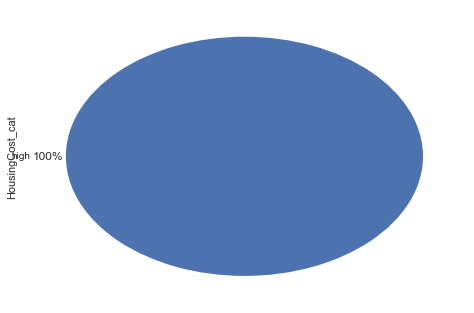

--------------------------
State=AL
low       8
medium    2
Name: HousingCost_cat, dtype: int64


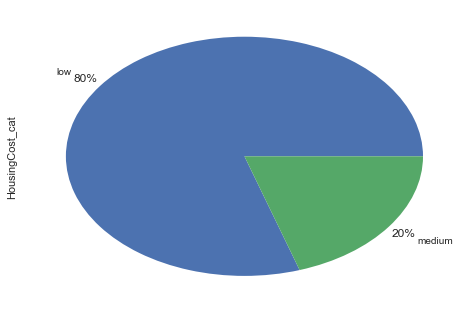

--------------------------
State=AR
low       4
medium    2
Name: HousingCost_cat, dtype: int64


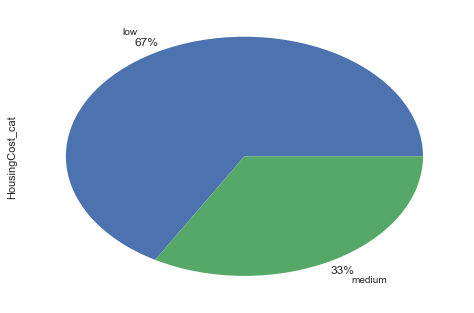

--------------------------
State=AZ
medium    2
Name: HousingCost_cat, dtype: int64


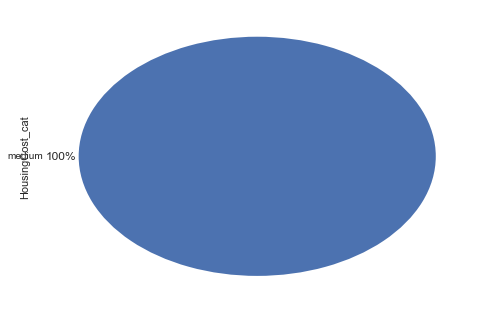

--------------------------
State=CA
high      15
medium     7
Name: HousingCost_cat, dtype: int64


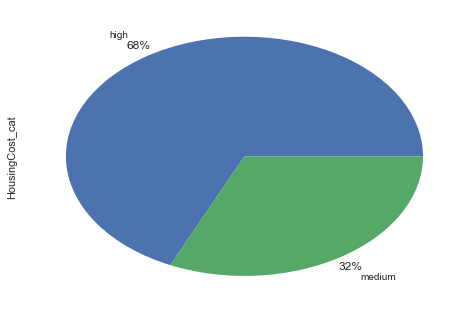

--------------------------
State=CO
high      3
medium    2
low       1
Name: HousingCost_cat, dtype: int64


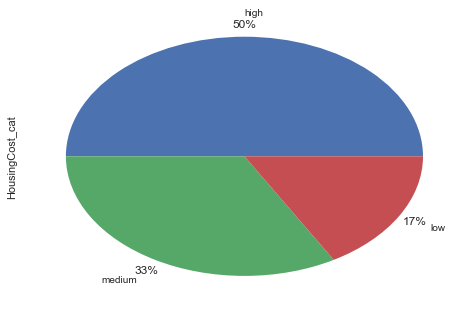

--------------------------
State=CT
high    11
Name: HousingCost_cat, dtype: int64


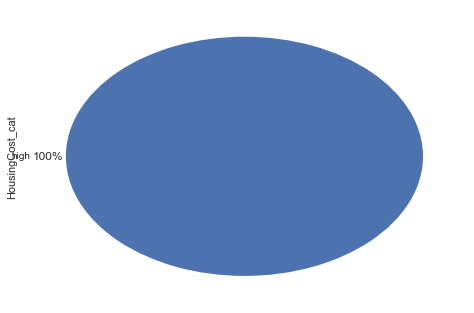

--------------------------
State=DC
high    1
Name: HousingCost_cat, dtype: int64


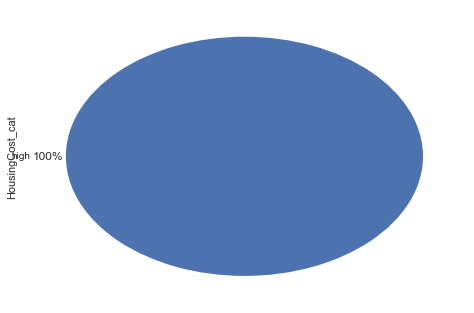

--------------------------
State=DE
medium    1
Name: HousingCost_cat, dtype: int64


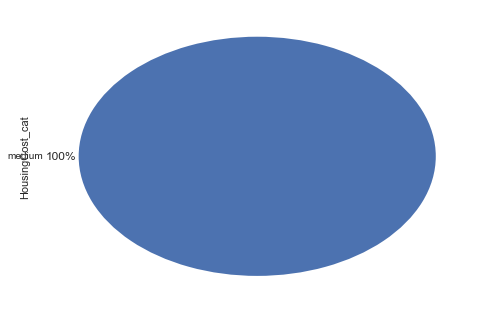

--------------------------
State=FL
medium    10
high       5
low        4
Name: HousingCost_cat, dtype: int64


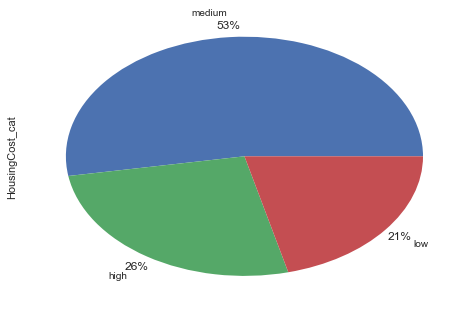

--------------------------
State=GA
low       5
medium    3
Name: HousingCost_cat, dtype: int64


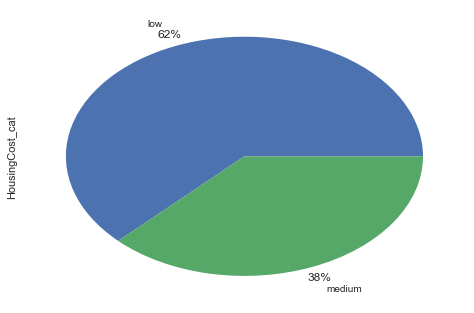

--------------------------
State=HI
high    1
Name: HousingCost_cat, dtype: int64


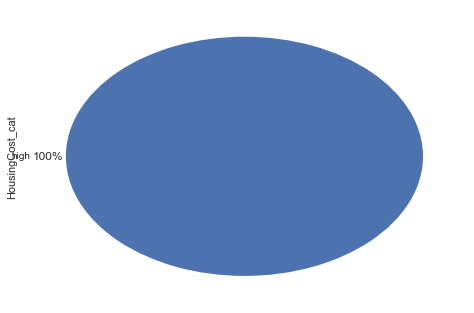

--------------------------
State=IA
medium    6
high      1
low       1
Name: HousingCost_cat, dtype: int64


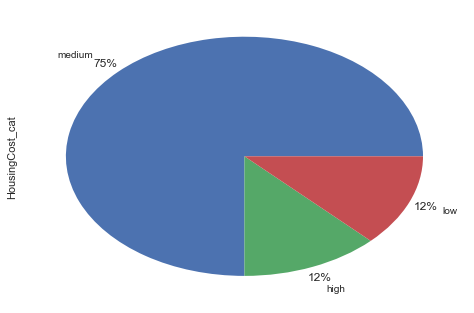

--------------------------
State=ID
medium    1
Name: HousingCost_cat, dtype: int64


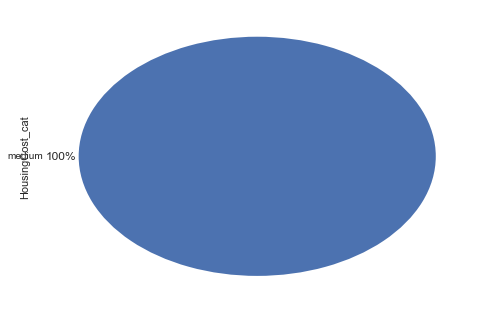

--------------------------
State=IL
medium    9
high      4
low       2
Name: HousingCost_cat, dtype: int64


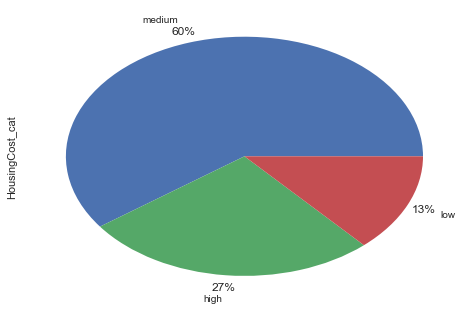

--------------------------
State=IN
low       8
medium    6
Name: HousingCost_cat, dtype: int64


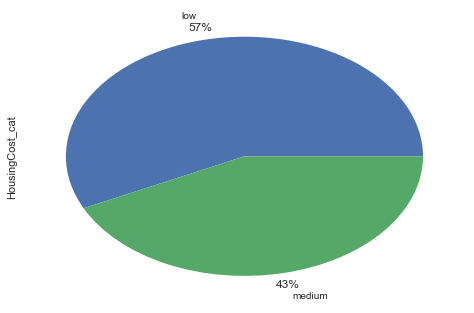

--------------------------
State=KS
medium    4
Name: HousingCost_cat, dtype: int64


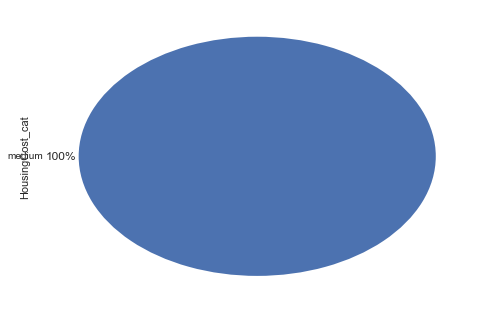

--------------------------
State=KY
medium    4
low       3
Name: HousingCost_cat, dtype: int64


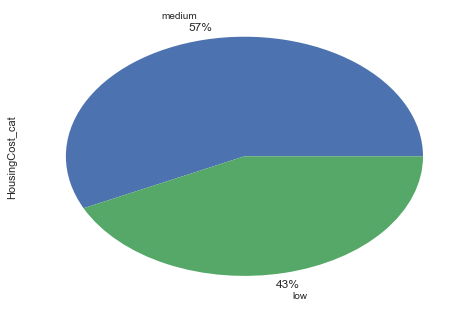

--------------------------
State=LA
medium    5
low       3
Name: HousingCost_cat, dtype: int64


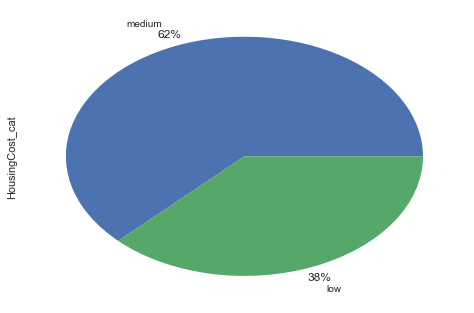

--------------------------
State=MA
medium    6
high      6
Name: HousingCost_cat, dtype: int64


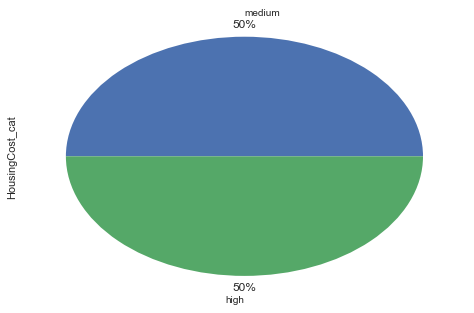

--------------------------
State=MD
medium    2
high      2
low       1
Name: HousingCost_cat, dtype: int64


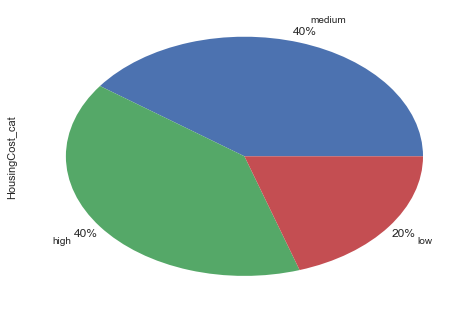

--------------------------
State=ME
medium    3
high      1
Name: HousingCost_cat, dtype: int64


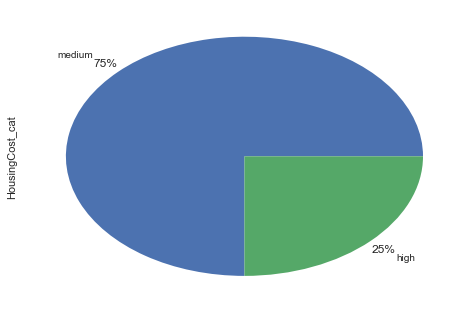

--------------------------
State=MI
medium    8
low       2
high      1
Name: HousingCost_cat, dtype: int64


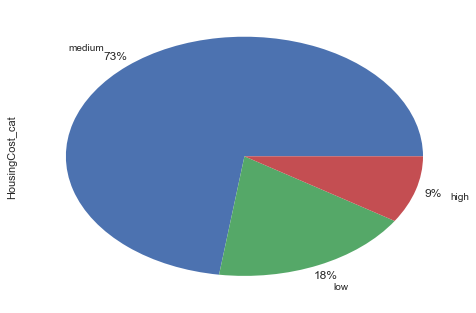

--------------------------
State=MN
medium    2
high      2
low       1
Name: HousingCost_cat, dtype: int64


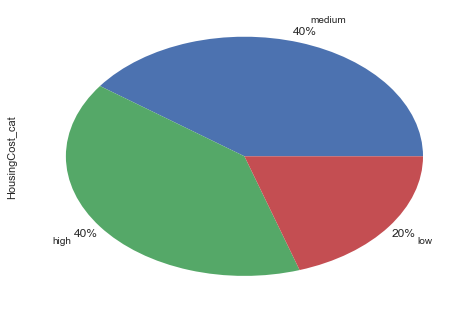

--------------------------
State=MO
medium    3
low       3
Name: HousingCost_cat, dtype: int64


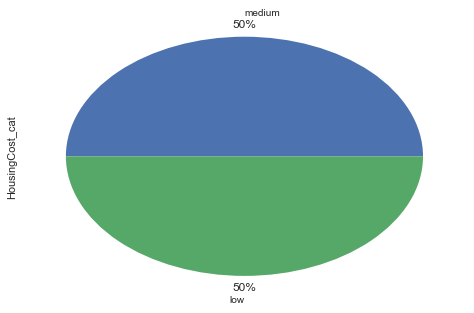

--------------------------
State=MS
medium    2
low       2
Name: HousingCost_cat, dtype: int64


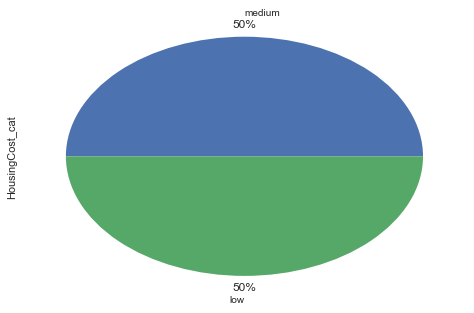

--------------------------
State=MT
medium    2
Name: HousingCost_cat, dtype: int64


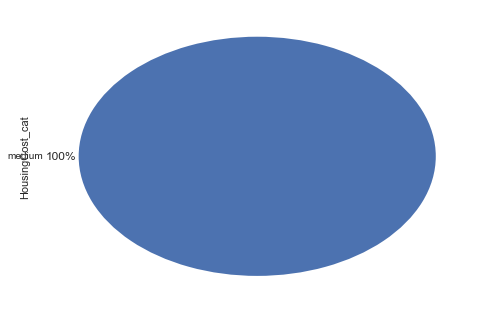

--------------------------
State=NC
medium    5
low       4
Name: HousingCost_cat, dtype: int64


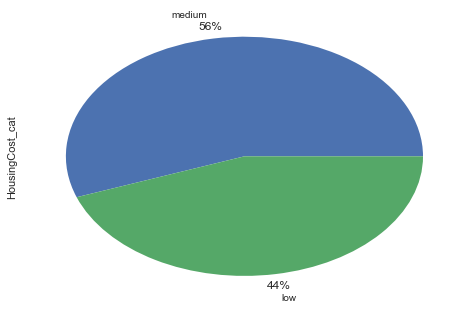

--------------------------
State=ND
medium    3
Name: HousingCost_cat, dtype: int64


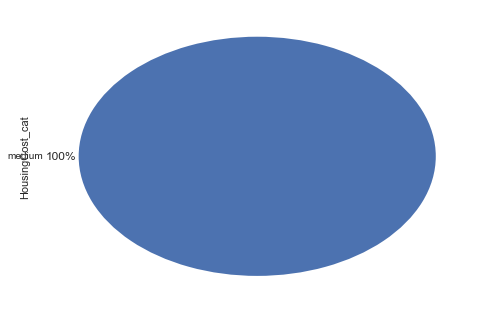

--------------------------
State=NE
medium    2
low       1
Name: HousingCost_cat, dtype: int64


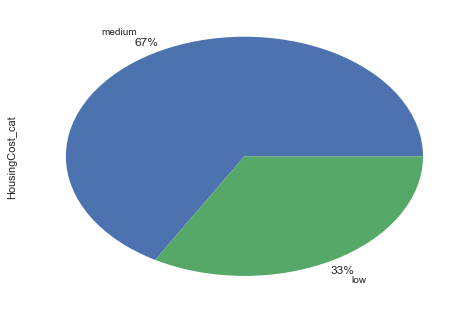

--------------------------
State=NH
high    5
Name: HousingCost_cat, dtype: int64


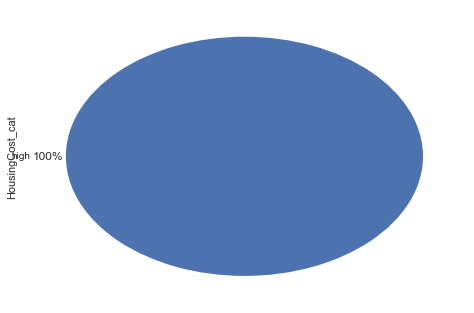

--------------------------
State=NJ
high      6
medium    5
Name: HousingCost_cat, dtype: int64


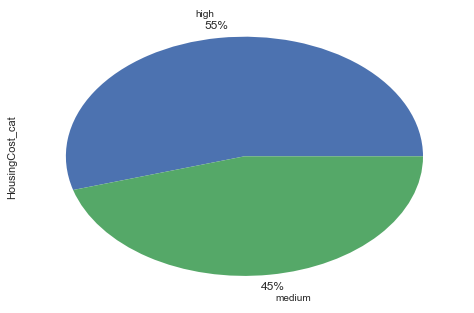

--------------------------
State=NM
medium    2
Name: HousingCost_cat, dtype: int64


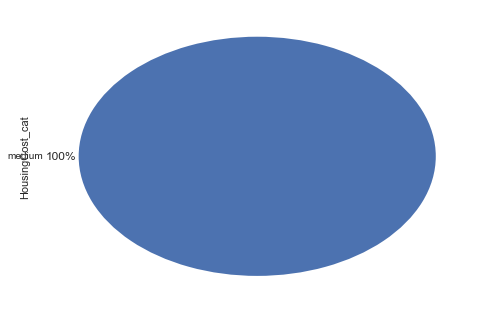

--------------------------
State=NV
high    2
Name: HousingCost_cat, dtype: int64


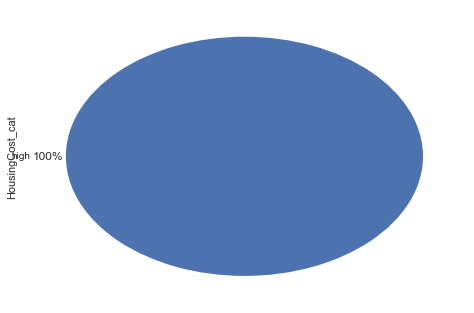

--------------------------
State=NY
medium    9
high      4
Name: HousingCost_cat, dtype: int64


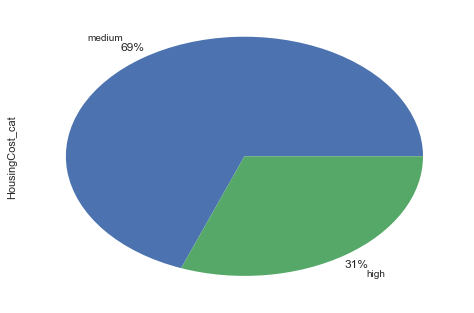

--------------------------
State=OH
medium    11
low        4
high       1
Name: HousingCost_cat, dtype: int64


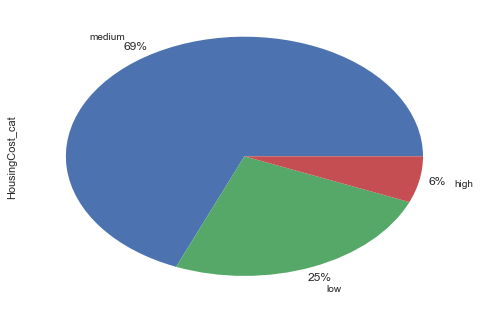

--------------------------
State=OK
medium    3
low       2
Name: HousingCost_cat, dtype: int64


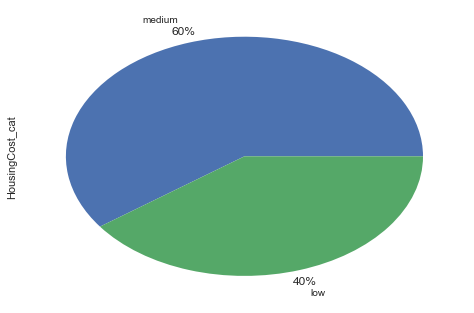

--------------------------
State=OR
medium    2
high      2
Name: HousingCost_cat, dtype: int64


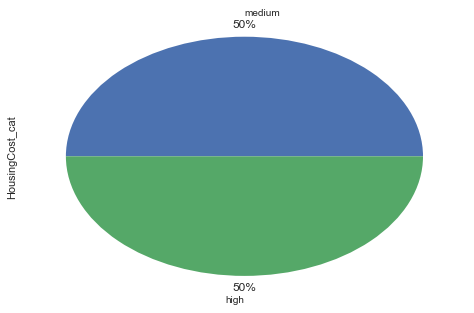

--------------------------
State=PA
medium    11
low        4
Name: HousingCost_cat, dtype: int64


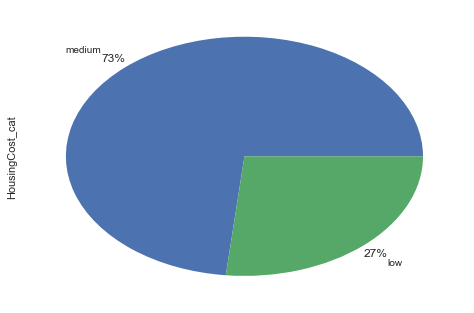

--------------------------
State=RI
high    4
Name: HousingCost_cat, dtype: int64


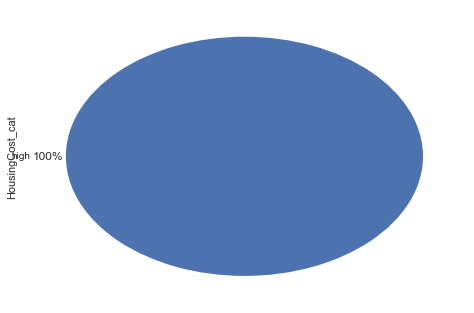

--------------------------
State=SC
low       4
medium    3
Name: HousingCost_cat, dtype: int64


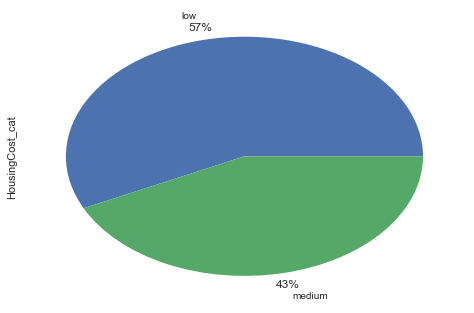

--------------------------
State=SD
medium    1
Name: HousingCost_cat, dtype: int64


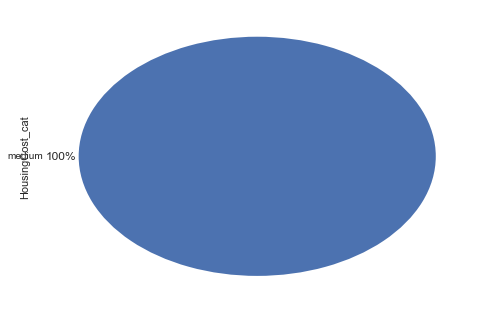

--------------------------
State=TN
low       4
medium    2
Name: HousingCost_cat, dtype: int64


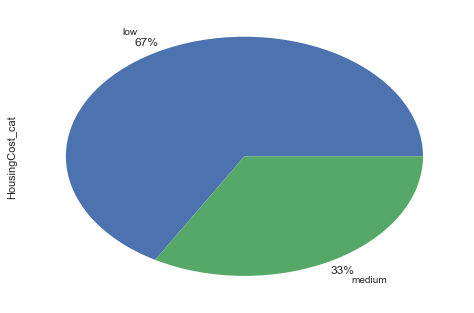

--------------------------
State=TX
low       13
medium    12
high       2
Name: HousingCost_cat, dtype: int64


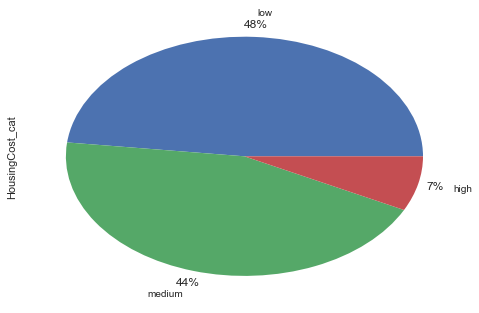

--------------------------
State=UT
high    2
Name: HousingCost_cat, dtype: int64


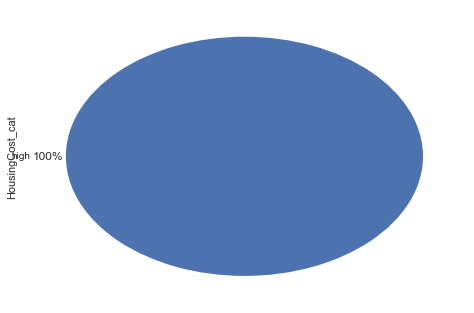

--------------------------
State=VA
medium    4
high      2
low       2
Name: HousingCost_cat, dtype: int64


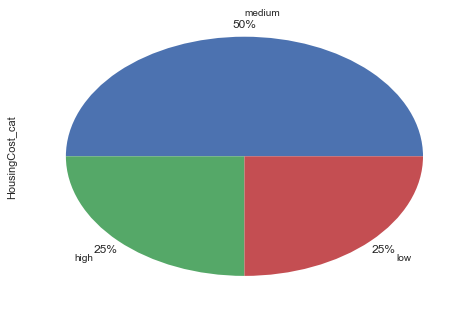

--------------------------
State=VT
high    1
Name: HousingCost_cat, dtype: int64


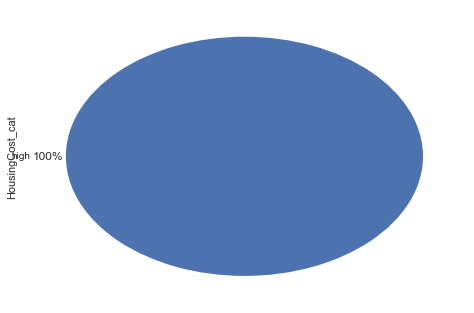

--------------------------
State=WA
medium    5
high      3
low       1
Name: HousingCost_cat, dtype: int64


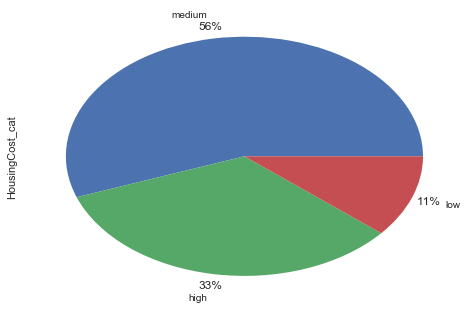

--------------------------
State=WI
medium    9
high      3
low       1
Name: HousingCost_cat, dtype: int64


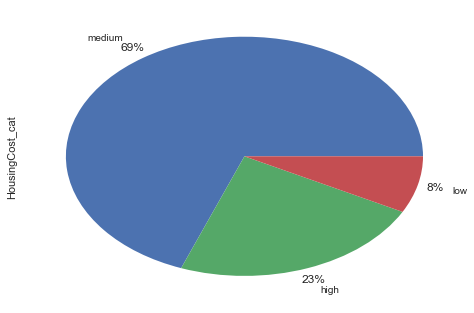

--------------------------
State=WV
low       5
medium    1
Name: HousingCost_cat, dtype: int64


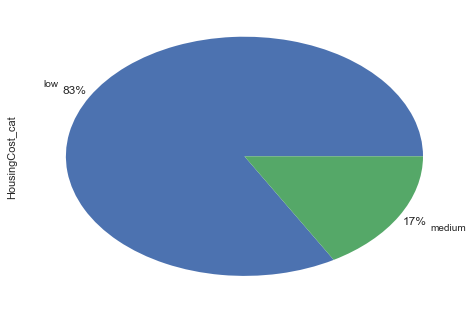

--------------------------
State=WY
high    1
Name: HousingCost_cat, dtype: int64


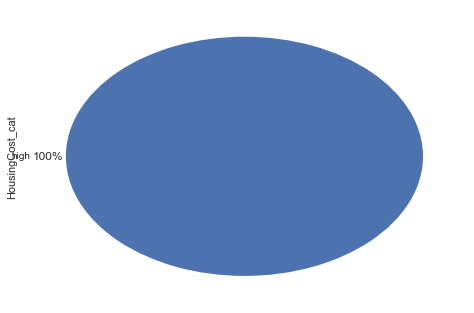

--------------------------


In [122]:
for state, group in data.groupby('State'):
    print('State=' + str(state))
    print(group['HousingCost_cat'].value_counts())
    group['HousingCost_cat'].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    plt.show()
    print('--------------------------')

# Task 8

Выполните кластеризацию городов по представленным характеристикам. При кластеризации не используйте признаки Log и Lat.

Попытайтесь дать интерпретацию полученным кластерам. Посмотрите на связь полученных кластеров с территориальным расположением, используйте визуализацию.

In [124]:
# приведение к единичной Евклидовой норме
data_to_norm = data.drop(['Place','Long','Lat','State','HousingCost_cat'], axis=1)
data_norm = pd.DataFrame(preprocessing.normalize(data_to_norm, norm='l2'),
                           columns=[data_to_norm.columns])
data_norm.head()

Climate HousingCost  HlthCare     Crime    Transp      Educ      Arts  \
0  0.004673    0.055609  0.002126  0.008279  0.036155  0.024728  0.008933   
1  0.000871    0.012322  0.002507  0.001342  0.007393  0.003691  0.008425   
2  0.004148    0.065044  0.005477  0.008597  0.022432  0.022689  0.002100   
3  0.000569    0.009459  0.001712  0.000730  0.008233  0.004066  0.005568   
4  0.001569    0.019987  0.004413  0.003532  0.015617  0.007206  0.010707   

    Recreat      Econ       Pop  
0  0.012602  0.068462  0.994972  
1  0.003985  0.006586  0.999820  
2  0.007613  0.046530  0.996194  
3  0.001934  0.007014  0.999869  
4  0.006220  0.013638  0.999465

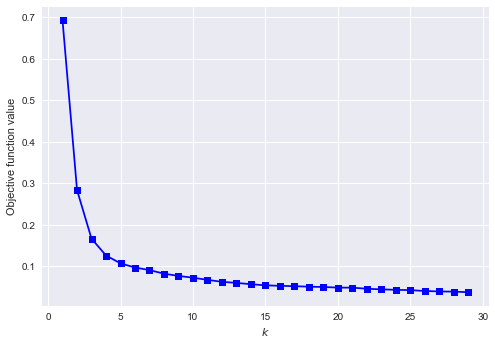

In [134]:
from sklearn.cluster import KMeans
inertia = []
end = 30
for k in range(1, end):
    Z = KMeans(n_clusters=k,
               init='random',
               n_init=100,
               max_iter=1000,
               random_state=2).fit(data_norm)
    inertia.append(Z.inertia_)
    
plt.plot(range(1, end), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')

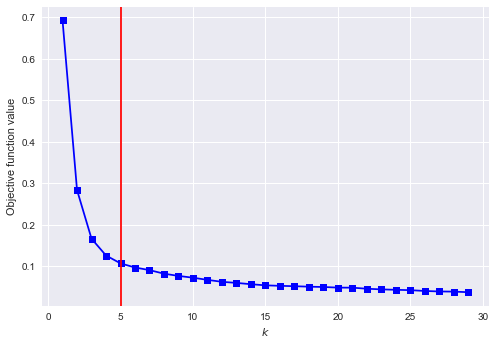

In [135]:
plt.plot(range(1, end), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.axvline(x=5,c='r')
plt.show()

In [140]:
kmeans = KMeans(n_clusters=5,
    init='random',
    n_init=1,
    max_iter=1000,
    random_state=2)

kmeans.fit(data_norm)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

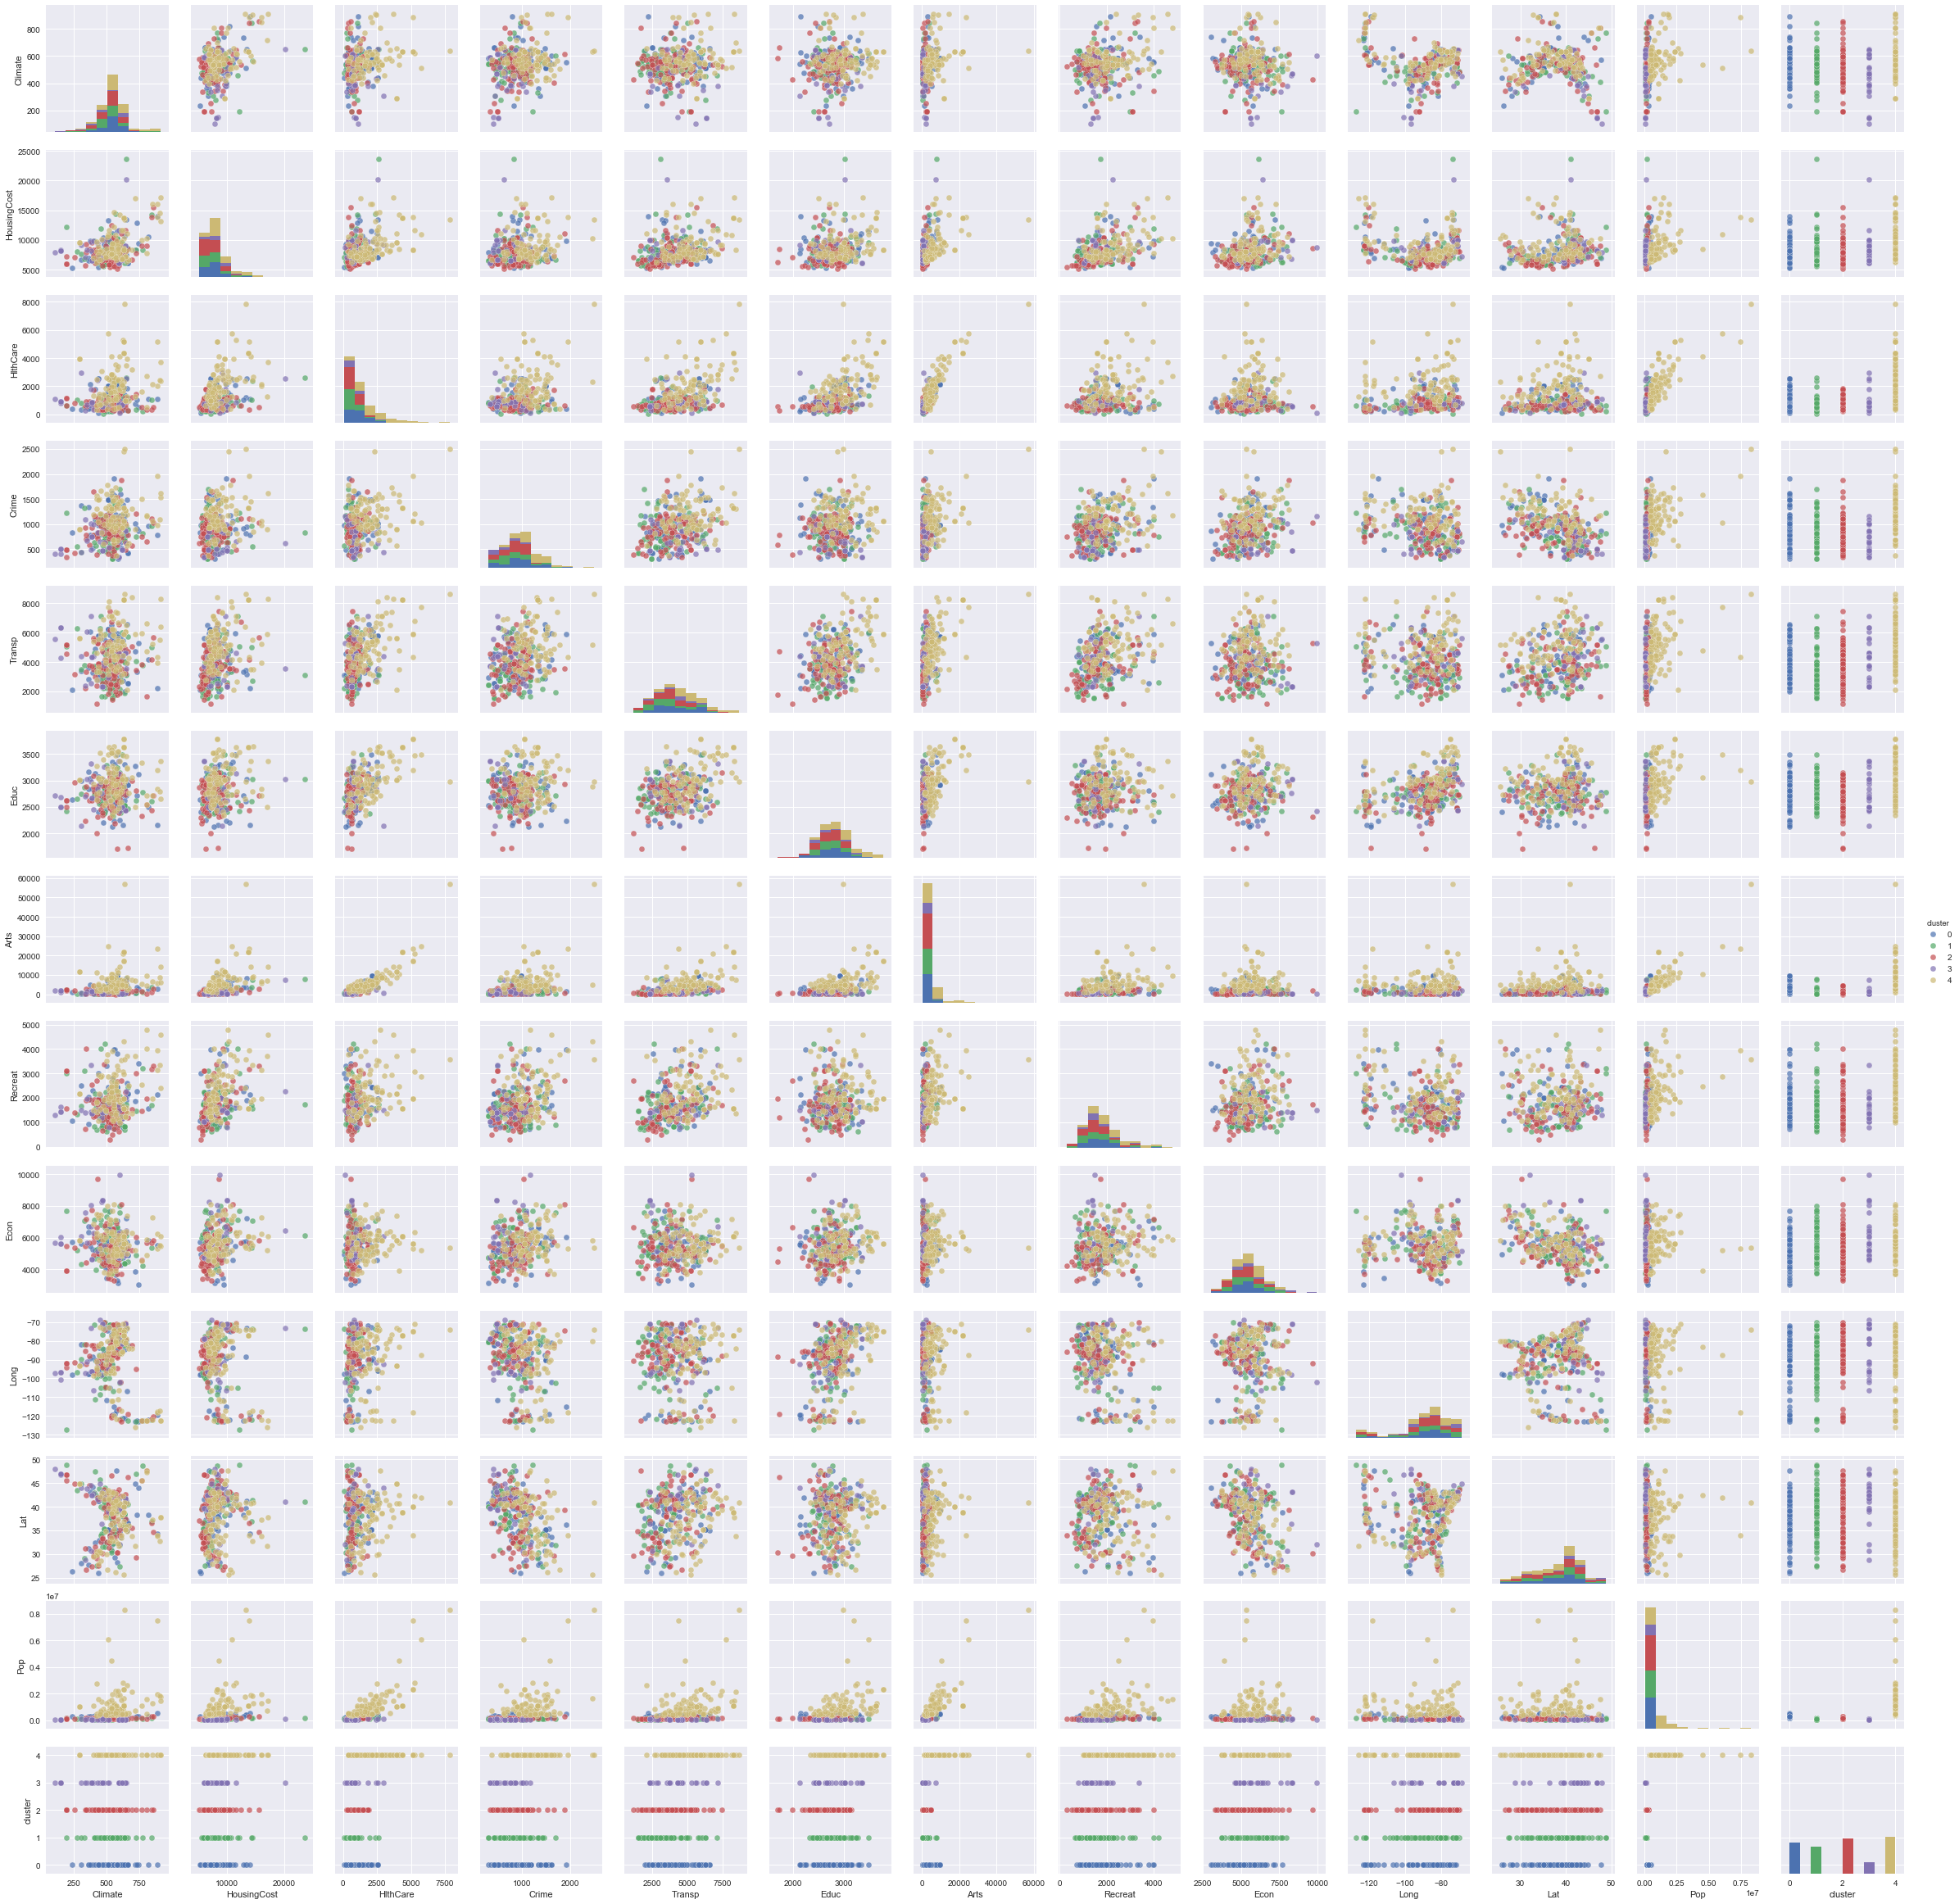

In [141]:
data['cluster'] = kmeans.labels_
sns.pairplot(data, hue='cluster', plot_kws={'alpha':0.7})
plt.show()

In [142]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_tsne(labels = None):
    plt.figure(figsize=(12,10))
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c = labels,
                edgecolor='none', alpha=0.7, s=40,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    
    if (labels is not None):
        plt.colorbar()
    plt.xlabel("t-SNE dimension 1")
    plt.ylabel("t-SNE dimension 2")
    plt.title('MNIST. t-SNE projection')
    plt.show()

def plot_pca(labels = None):
    plt.figure(figsize=(12,8))
    plt.scatter(data_pca[:,0], data_pca[:,1], c=labels)
    plt.title('PCA')
    plt.plot()
    plt.show()

tsne = TSNE(random_state=17)
data_tsne = tsne.fit_transform(data_to_norm)

pca = PCA(2)
data_pca = pca.fit_transform(data_to_norm)

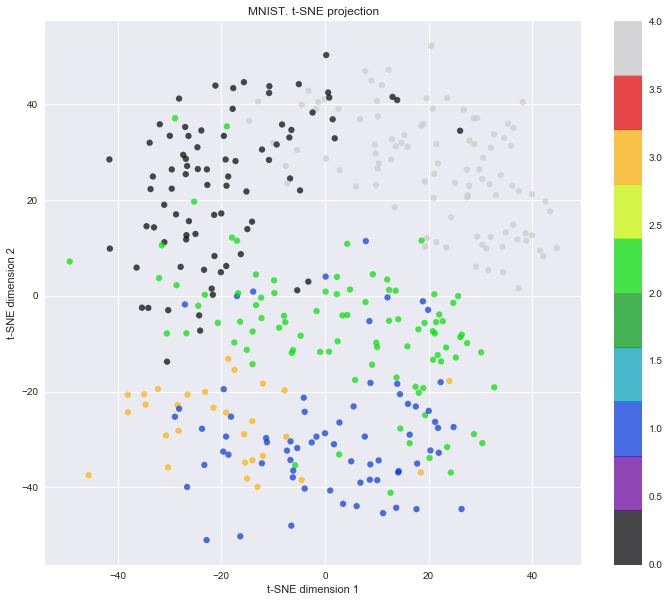

In [143]:
plot_tsne(kmeans.labels_)

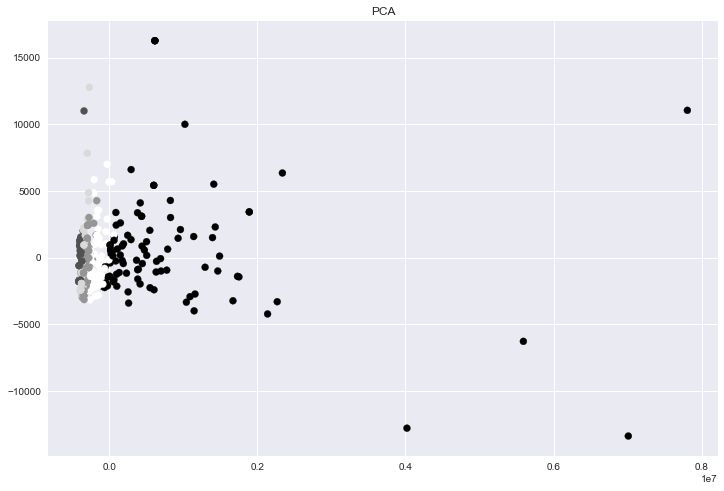

In [144]:
plot_pca(kmeans.labels_)

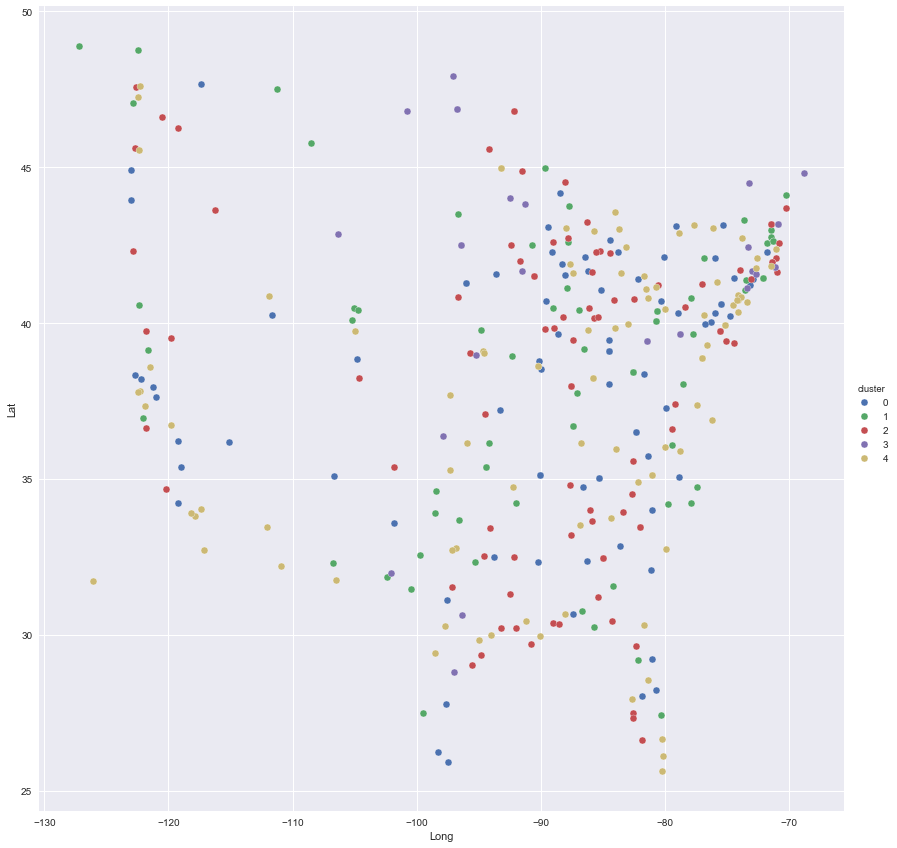

In [145]:
sns.pairplot(x_vars="Long", y_vars="Lat", data=data, size=12, hue='cluster')

In [146]:
# Средние значения для каждого кластера 
for i in range(5):
    idx = np.argwhere(kmeans.labels_ == i)
    clust = data.iloc[idx.flatten()]
    
    '''fig, axes = plt.subplots(nrows=1,ncols=2)
    fig.set_figwidth(15)
    fig.set_figheight(5)

    clust.mean().plot.bar(ax=axes[0])
    clust.plot.box(ax=axes[1])
    
    axes[0].set_title('Mean');
    plt.suptitle(str(i+1)+' cluster', fontsize=14)
    plt.show()'''
    
    print("Mean:")
    print(clust.mean(),'\n')

Mean:
Climate           549.765432
HousingCost      8014.679012
HlthCare         1066.481481
Crime             947.135802
Transp           4198.691358
Educ             2783.604938
Arts             2680.827160
Recreat          1813.370370
Econ             5275.419753
Long              -90.463086
Lat                37.889000
Pop            306529.851852
cluster             0.000000
dtype: float64 

Mean:
Climate           524.071429
HousingCost      8032.557143
HlthCare          718.485714
Crime             825.928571
Transp           3424.200000
Educ             2764.300000
Arts             1275.785714
Recreat          1604.157143
Econ             5584.042857
Long              -89.682137
Lat                38.695757
Pop            112677.085714
cluster             1.000000
dtype: float64 

Mean:
Climate           524.252747
HousingCost      7624.934066
HlthCare          773.450549
Crime             870.626374
Transp           3794.208791
Educ             2707.813187
Arts             138

# Task 3 (Test)


In [1107]:
len(data.loc[data["Place"] == "Cedar-Rapids,IA"].Place.str.split(","))

1

In [1108]:
places = data.loc[:, "Place"]
multiple_states = []

bool_array = np.empty(len(places), dtype=bool)

for i in range(len(places)):
    bool_array[i] = False

bool_array

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1109]:
i = 0
for place in places:
    splitted = place.split(",")
    end = len(splitted) - 1
    states = splitted[end]
    if "-" in states:
        multiple_states.append(place)
        print(place)
        
        bool_array[i] = True

    i = i + 1

Allentown,Bethlehem,PA-NJ
Augusta,GA-SC
Charlotte-Gastonia-Rock-Hill,NC-SC
Chattanooga,TN-GA
Cincinnati,OH-KY-IN
Clarksville-Hopkinsville,TN-KY
Columbus,GA-AL
Cumberland,MD-WV
Davenport-Rock-Island-Moline,IA-IL
Duluth,MN-WI
Evansville,IN-KY
Fall-River,MA-RI
Fargo-Moorhead,ND-MN
Fort-Smith,AR-OK
Huntington-Ashland,WV-KY-OH
Johnson-City-Kingsport-Bristol,TN-VA
Lawrence-Haverhill,MA-NH
Louisville,KY-IN
Lowell,MA-NH
Memphis,TN-AR-MS
Minneapolis-St.-Paul,MN-WI
New-London-Norwich,CT-RI
Omaha,NE-IA
Parkerburg-Marietta,WV-OH
Pawtucket-Woonsocket-Attleboro,RI-MA
Philadelphia,PA-NJ
Portsmouth-Dover-Rochester,NH-ME
St.-Louis,MO-IL
Sioux-City,IA-NE
Steubenville-Weirton,OH-WV
Washington,DC-MD-VA
Wheeling,WV-OH
Wilmington,DE-NJ-MD


In [1110]:
new_entities = []
multi_states = data.loc[bool_array].Place
for place in multi_states:
    splitted = place.split(",")
    end = len(splitted) - 1
    wired_states = splitted[end]
    states = wired_states.split("-")
    name = ""
    for i in range(len(splitted) - 1):
        name = name + splitted[i] + ","
    
    new_names = []
    for state in states:
        new_names.append(name + state)
        
    old_entity = data.loc[data["Place"] == place]
    #print("Old:")
    #print(old_entity)
    for new_name in new_names:
        new_entity = old_entity.copy()
        #print("New:")
        new_entity.Place = new_name
        #print(new_entity)
        new_entities.append(new_entity)
        data = data[data["Place"] != place]
    
new_entities   

[                    Place  Climate  HousingCost  HlthCare  Crime  Transp  \
 6  Allentown,Bethlehem,PA      559         8288       621    514    2881   
 
    Educ  Arts  Recreat  Econ     Long      Lat     Pop  
 6  3144  2333     1117  5097 -75.4405  40.6155  635481  ,
                     Place  Climate  HousingCost  HlthCare  Crime  Transp  \
 6  Allentown,Bethlehem,NJ      559         8288       621    514    2881   
 
    Educ  Arts  Recreat  Econ     Long      Lat     Pop  
 6  3144  2333     1117  5097 -75.4405  40.6155  635481  ,
          Place  Climate  HousingCost  HlthCare  Crime  Transp  Educ  Arts  \
 21  Augusta,GA      534         6292      1798    872    2523  2915  1047   
 
     Recreat  Econ    Long    Lat     Pop  
 21      913  5431 -81.967  33.47  345918  ,
          Place  Climate  HousingCost  HlthCare  Crime  Transp  Educ  Arts  \
 21  Augusta,SC      534         6292      1798    872    2523  2915  1047   
 
     Recreat  Econ    Long    Lat     Pop  
 21  

In [1111]:
#df2 = pd.DataFrame(new_entities) 
variables = new_entities[0].keys()
df = pd.DataFrame([[getattr(i,j) for j in variables] for i in new_entities], columns = variables)


In [1114]:
df

Place  \
0   6    Allentown,Bethlehem,PA
Name: Place, dtype...   
1   6    Allentown,Bethlehem,NJ
Name: Place, dtype...   
2         21    Augusta,GA
Name: Place, dtype: object   
3         21    Augusta,SC
Name: Place, dtype: object   
4   61    Charlotte-Gastonia-Rock-Hill,NC
Name: Pl...   
5   61    Charlotte-Gastonia-Rock-Hill,SC
Name: Pl...   
6     63    Chattanooga,TN
Name: Place, dtype: object   
7     63    Chattanooga,GA
Name: Place, dtype: object   
8      66    Cincinnati,OH
Name: Place, dtype: object   
9      66    Cincinnati,KY
Name: Place, dtype: object   
10     66    Cincinnati,IN
Name: Place, dtype: object   
11  67    Clarksville-Hopkinsville,TN
Name: Place,...   
12  67    Clarksville-Hopkinsville,KY
Name: Place,...   
13       72    Columbus,GA
Name: Place, dtype: object   
14       72    Columbus,AL
Name: Place, dtype: object   
15     75    Cumberland,MD
Name: Place, dtype: object   
16     75    Cumberland,WV
Name: Place, dtype: object   
17  79    Davenport-Rock-Island-Moline,IA
Name: Pl...   
18  79    Davenport-Rock-Island-Moline,IL
Name: Pl...   
19         88    Duluth,MN
Name: Place, dtype: object   
20         88    Duluth,WI
Name: Place, dtype: object   
21     97    Evansville,IN
Name: Place, dtype: object   
22     97    Evansville,KY
Name: Place, dtype: object   
23     98    Fall-River,MA
Name: Place, dtype: object   
24     98    Fall-River,RI
Name: Place, dtype: object   
25  99    Fargo-Moorhead,ND
Name: Place, dtype: ob...   
26  99    Fargo-Moorhead,MN
Name: Place, dtype: ob...   
27    110    Fort-Smith,AR
Name: Place, dtype: object   
28    110    Fort-Smith,OK
Name: Place, dtype: object   
29  135    Huntington-Ashland,WV
Name: Place, dtyp...   
..                                                ...   
41       190    Memphis,AR
Name: Place, dtype: object   
42       190    Memphis,MS
Name: Place, dtype: object   
43  196    Minneapolis-St.-Paul,MN
Name: Place, dt...   
44  196    Minneapolis-St.-Paul,WI
Name: Place, dt...   
45  210    New-London-Norwich,CT
Name: Place, dtyp...   
46  210    New-London-Norwich,RI
Name: Place, dtyp...   
47         222    Omaha,NE
Name: Place, dtype: object   
48         222    Omaha,IA
Name: Place, dtype: object   
49  228    Parkerburg-Marietta,WV
Name: Place, dty...   
50  228    Parkerburg-Marietta,OH
Name: Place, dty...   
51  230    Pawtucket-Woonsocket-Attleboro,RI
Name:...   
52  230    Pawtucket-Woonsocket-Attleboro,MA
Name:...   
53  233    Philadelphia,PA
Name: Place, dtype: object   
54  233    Philadelphia,NJ
Name: Place, dtype: object   
55  240    Portsmouth-Dover-Rochester,NH
Name: Pla...   
56  240    Portsmouth-Dover-Rochester,ME
Name: Pla...   
57     261    St.-Louis,MO
Name: Place, dtype: object   
58     261    St.-Louis,IL
Name: Place, dtype: object   
59    282    Sioux-City,IA
Name: Place, dtype: object   
60    282    Sioux-City,NE
Name: Place, dtype: object   
61  291    Steubenville-Weirton,OH
Name: Place, dt...   
62  291    Steubenville-Weirton,WV
Name: Place, dt...   
63    313    Washington,DC
Name: Place, dtype: object   
64    313    Washington,MD
Name: Place, dtype: object   
65    313    Washington,VA
Name: Place, dtype: object   
66      318    Wheeling,WV
Name: Place, dtype: object   
67      318    Wheeling,OH
Name: Place, dtype: object   
68    322    Wilmington,DE
Name: Place, dtype: object   
69    322    Wilmington,NJ
Name: Place, dtype: object   
70    322    Wilmington,MD
Name: Place, dtype: object   

                                   Climate  \
0     6    559
Name: Climate, dtype: int64   
1     6    559
Name: Climate, dtype: int64   
2    21    534
Name: Climate, dtype: int64   
3    21    534
Name: Climate, dtype: int64   
4    61    644
Name: Climate, dtype: int64   
5    61    644
Name: Climate, dtype: int64   
6    63    576
Name: Climate, dtype: int64   
7    63    576
Name: Climate, dtype: int64   
8    66    584
Name: Climate, dtype: int64   
9    66    584
Name: Climate, dtype: int64   
10   66

In [835]:
for new_entity in new_entities:
    data.append(new_entity)

In [836]:
data

Place  Climate  HousingCost  \
0                                    Abilene,TX      521         6200   
1                                      Akron,OH      575         8138   
2                                     Albany,GA      468         7339   
3                    Albany-Schenectady-Troy,NY      476         7908   
4                                Albuquerque,NM      659         8393   
5                                 Alexandria,LA      520         5819   
7                         Alton,Granite-City,IL      537         6487   
8                                    Altoona,PA      561         6191   
9                                   Amarillo,TX      609         6546   
10                         Anaheim-Santa-Ana,CA      885        16047   
11                                 Anchorage,AK      195        12175   
12                                  Anderson,IN      530         5704   
13                                  Anderson,SC      591         5725   
14                                 Ann-Arbor,MI      546        11014   
15                                  Anniston,AL      560         5530   
16                   Appleton-Oshkosh-Neenah,WI      396         7877   
17                                 Asheville,NC      694         6722   
18                                    Athens,GA      601         6691   
19                                   Atlanta,GA      696         8316   
20                             Atlantic-City,NJ      615        11074   
22                              Aurora-Elgin,IL      474        10384   
23                                    Austin,TX      435         8831   
24                               Bakersfield,CA      560         8068   
25                                 Baltimore,MD      567         9148   
26                                    Bangor,ME      451         7277   
27                               Baton-Rouge,LA      427         8083   
28                              Battle-Creek,MI      527         6342   
29                      Beaumont-Port-Arthur,TX      423         6288   
30                             Beaver-County,PA      586         7866   
31                                Bellingham,WA      772         8329   
..                                          ...      ...          ...   
296          Tampa-St.-Petersburg-Clearwater,FL      440         7442   
297                              Terre-Haute,IN      557         5527   
298                   Texarkana,TX-Texarkana,AR      467         5717   
299                                   Toledo,OH      518         7767   
300                                   Topeka,KS      501         7110   
301                                  Trenton,NJ      636        10616   
302                                   Tuscon,AZ      589         8548   
303                                    Tulsa,OK      530         7498   
304                               Tuscaloosa,AL      470         6464   
305                                    Tyler,TX      500         7298   
306                               Utica-Rome,NY      548         6744   
307                   Vallejo-Fairfield-Napa,CA      821        10503   
308                                Vancouver,WA      768         9015   
309                                 Victoria,TX      336         7143   
310             Vineland-Millville-Bridgeton,NJ      615         7295   
311               Visalia-Tulare-Porterville,CA      543         7778   
312                                     Waco,TX      412         6106   
314                                Materbury,CT      569        10024   
315                     Waterloo-Cedar-Falls,IA      347         7881   
316                                   Wausau,WI      308         7642   
317  West-Palm-Beach-Boca-Raton-Delray-Beach,FL      509        10512   
319                                  Wichita,KS      494         7061   
320                            Wichita-Falls,TX      456         6404   
321                        

In [1115]:
data[data["Place"].str.contains("Washington")]

Empty DataFrame
Columns: [Place, Climate, HousingCost, HlthCare, Crime, Transp, Educ, Arts, Recreat, Econ, Long, Lat, Pop]
Index: []

In [1121]:
data = data.append(df)

In [1122]:
data

Place  \
0                                          Abilene,TX   
1                                            Akron,OH   
2                                           Albany,GA   
3                          Albany-Schenectady-Troy,NY   
4                                      Albuquerque,NM   
5                                       Alexandria,LA   
7                               Alton,Granite-City,IL   
8                                          Altoona,PA   
9                                         Amarillo,TX   
10                               Anaheim-Santa-Ana,CA   
11                                       Anchorage,AK   
12                                        Anderson,IN   
13                                        Anderson,SC   
14                                       Ann-Arbor,MI   
15                                        Anniston,AL   
16                         Appleton-Oshkosh-Neenah,WI   
17                                       Asheville,NC   
18                                          Athens,GA   
19                                         Atlanta,GA   
20                                   Atlantic-City,NJ   
22                                    Aurora-Elgin,IL   
23                                          Austin,TX   
24                                     Bakersfield,CA   
25                                       Baltimore,MD   
26                                          Bangor,ME   
27                                     Baton-Rouge,LA   
28                                    Battle-Creek,MI   
29                            Beaumont-Port-Arthur,TX   
30                                   Beaver-County,PA   
31                                      Bellingham,WA   
..                                                ...   
41       190    Memphis,AR
Name: Place, dtype: object   
42       190    Memphis,MS
Name: Place, dtype: object   
43  196    Minneapolis-St.-Paul,MN
Name: Place, dt...   
44  196    Minneapolis-St.-Paul,WI
Name: Place, dt...   
45  210    New-London-Norwich,CT
Name: Place, dtyp...   
46  210    New-London-Norwich,RI
Name: Place, dtyp...   
47         222    Omaha,NE
Name: Place, dtype: object   
48         222    Omaha,IA
Name: Place, dtype: object   
49  228    Parkerburg-Marietta,WV
Name: Place, dty...   
50  228    Parkerburg-Marietta,OH
Name: Place, dty...   
51  230    Pawtucket-Woonsocket-Attleboro,RI
Name:...   
52  230    Pawtucket-Woonsocket-Attleboro,MA
Name:...   
53  233    Philadelphia,PA
Name: Place, dtype: object   
54  233    Philadelphia,NJ
Name: Place, dtype: object   
55  240    Portsmouth-Dover-Rochester,NH
Name: Pla...   
56  240    Portsmouth-Dover-Rochester,ME
Name: Pla...   
57     261    St.-Louis,MO
Name: Place, dtype: object   
58     261    St.-Louis,IL
Name: Place, dtype: object   
59    282    Sioux-City,IA
Name: Place, dtype: object   
60    282    Sioux-City,NE
Name: Place, dtype: object   
61  291    Steubenville-Weirton,OH
Name: Place, dt...   
62  291    Steubenville-Weirton,WV
Name: Place, dt...   
63    313    Washington,DC
Name: Place, dtype: object   
64    313    Washington,MD
Name: Place, dtype: object   
65    313    Washington,VA
Name: Place, dtype: object   
66      318    Wheeling,WV
Name: Place, dtype: object   
67      318    Wheeling,OH
Name: Place, dtype: object   
68    322    Wilmington,DE
Name: Place, dtype: object   
69    322    Wilmington,NJ
Name: Place, dtype: object   
70    322    Wilmington,MD
Name: Place, dtype: object   

                                   Climate  \
0                                      521   
1                                      575   
2                                      468   
3                                      476   
4                                      659   
5                                      520   
7                                      537   
8                                      561   
9                                      609   
10                                     885   
11     

In [1123]:
data[data["Place"].str.contains("Washington")]

ValueError: cannot index with vector containing NA / NaN values

In [1124]:
data

Place  \
0                                          Abilene,TX   
1                                            Akron,OH   
2                                           Albany,GA   
3                          Albany-Schenectady-Troy,NY   
4                                      Albuquerque,NM   
5                                       Alexandria,LA   
7                               Alton,Granite-City,IL   
8                                          Altoona,PA   
9                                         Amarillo,TX   
10                               Anaheim-Santa-Ana,CA   
11                                       Anchorage,AK   
12                                        Anderson,IN   
13                                        Anderson,SC   
14                                       Ann-Arbor,MI   
15                                        Anniston,AL   
16                         Appleton-Oshkosh-Neenah,WI   
17                                       Asheville,NC   
18                                          Athens,GA   
19                                         Atlanta,GA   
20                                   Atlantic-City,NJ   
22                                    Aurora-Elgin,IL   
23                                          Austin,TX   
24                                     Bakersfield,CA   
25                                       Baltimore,MD   
26                                          Bangor,ME   
27                                     Baton-Rouge,LA   
28                                    Battle-Creek,MI   
29                            Beaumont-Port-Arthur,TX   
30                                   Beaver-County,PA   
31                                      Bellingham,WA   
..                                                ...   
41       190    Memphis,AR
Name: Place, dtype: object   
42       190    Memphis,MS
Name: Place, dtype: object   
43  196    Minneapolis-St.-Paul,MN
Name: Place, dt...   
44  196    Minneapolis-St.-Paul,WI
Name: Place, dt...   
45  210    New-London-Norwich,CT
Name: Place, dtyp...   
46  210    New-London-Norwich,RI
Name: Place, dtyp...   
47         222    Omaha,NE
Name: Place, dtype: object   
48         222    Omaha,IA
Name: Place, dtype: object   
49  228    Parkerburg-Marietta,WV
Name: Place, dty...   
50  228    Parkerburg-Marietta,OH
Name: Place, dty...   
51  230    Pawtucket-Woonsocket-Attleboro,RI
Name:...   
52  230    Pawtucket-Woonsocket-Attleboro,MA
Name:...   
53  233    Philadelphia,PA
Name: Place, dtype: object   
54  233    Philadelphia,NJ
Name: Place, dtype: object   
55  240    Portsmouth-Dover-Rochester,NH
Name: Pla...   
56  240    Portsmouth-Dover-Rochester,ME
Name: Pla...   
57     261    St.-Louis,MO
Name: Place, dtype: object   
58     261    St.-Louis,IL
Name: Place, dtype: object   
59    282    Sioux-City,IA
Name: Place, dtype: object   
60    282    Sioux-City,NE
Name: Place, dtype: object   
61  291    Steubenville-Weirton,OH
Name: Place, dt...   
62  291    Steubenville-Weirton,WV
Name: Place, dt...   
63    313    Washington,DC
Name: Place, dtype: object   
64    313    Washington,MD
Name: Place, dtype: object   
65    313    Washington,VA
Name: Place, dtype: object   
66      318    Wheeling,WV
Name: Place, dtype: object   
67      318    Wheeling,OH
Name: Place, dtype: object   
68    322    Wilmington,DE
Name: Place, dtype: object   
69    322    Wilmington,NJ
Name: Place, dtype: object   
70    322    Wilmington,MD
Name: Place, dtype: object   

                                   Climate  \
0                                      521   
1                                      575   
2                                      468   
3                                      476   
4                                      659   
5                                      520   
7                                      537   
8                                      561   
9                                      609   
10                                     885   
11     